# matplotlibの基礎的ななにかを学ぶなにか

https://www.amazon.co.jp/Python%E3%83%A6%E3%83%BC%E3%82%B6%E3%81%AE%E3%81%9F%E3%82%81%E3%81%AEJupyter-%E5%AE%9F%E8%B7%B5-%E5%85%A5%E9%96%80-%E6%B1%A0%E5%86%85-%E5%AD%9D%E5%95%93/dp/4774192236

この本の第４章

## 準備

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

## フィギュアとサブプロット

In [12]:
# これがフィギュアオブジェクト
fig = plt.figure()
plt.show()

<Figure size 432x288 with 0 Axes>

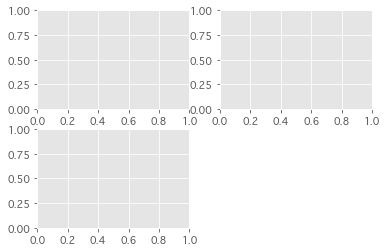

In [18]:
fig = plt.figure()
# フィギュアには必ず１つのサブプロット（グラフを描画する窓みたいななにか）が必要
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
plt.show()

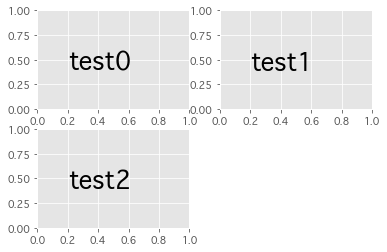

In [23]:
fig = plt.figure()
# フィギュアには必ず１つのサブプロット（グラフを描画する窓みたいななにか）が必要
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

for idx, ax in enumerate([ax1, ax2, ax3]):
    ax.text(x=0.2, y=0.4, s='test{}'.format(idx), fontsize=24)

<class 'numpy.ndarray'> [[<matplotlib.axes._subplots.AxesSubplot object at 0x11bd461d0>


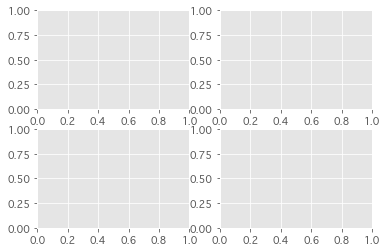

In [24]:
# figureとsubplotは同時に生成できる
fig, ax = plt.subplots(2, 2)
print(type(ax), ax)
plt.show()

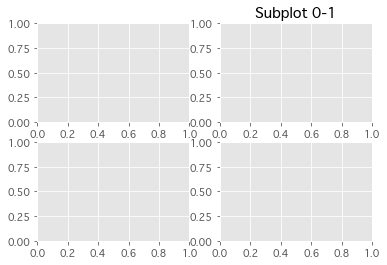

In [25]:
fig, axes = plt.subplots(2, 2)
axes[0, 1].set_title('Subplot 0-1')
plt.show()

## スタイルを適用

上でやっていた...

```
plt.style.use('ggplot')
```

## 折れ線グラフ

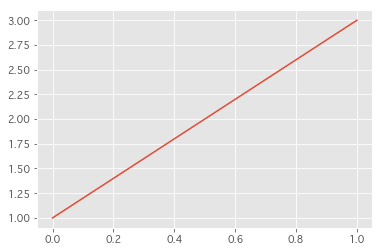

In [26]:
_, ax = plt.subplots()
ax.plot([1, 3])
plt.show()

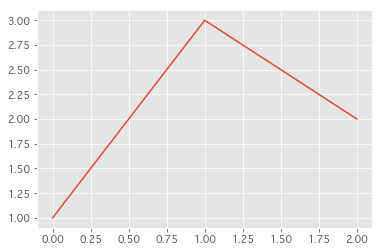

In [28]:
_, ax = plt.subplots()
ax.plot([1, 3, 2])
plt.show()

なる

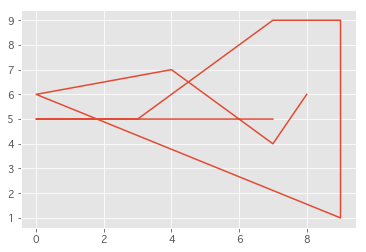

In [38]:
_, ax = plt.subplots()
x = np.random.randint(0, 10, (10,))
y = np.random.randint(0, 10, (10,))
ax.plot(x, y)

In [39]:
x, y

(array([8, 7, 4, 0, 9, 9, 7, 3, 0, 7]), array([6, 4, 7, 6, 1, 9, 9, 5, 5, 5]))

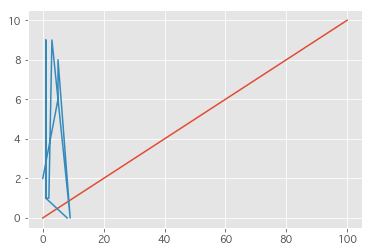

In [43]:
# 複数の線の描画
_, ax = plt.subplots()
x1 = np.linspace(0, 100, 100)
y1 = np.linspace(0, 10, 100)
x2 = np.random.randint(0, 10, (10,))
y2 = np.random.randint(0, 10, (10,))
ax.plot(x1, y1)
ax.plot(x2, y2)

In [49]:
url = 'https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/anime_stock_returns.csv'
df = pd.read_csv(url, index_col=0, parse_dates=['Date'])

In [50]:
df.head()

,TOEI ANIMATION,IG Port
Date,,
2015-01-01,1.000000,1.000000
2015-01-02,1.000000,1.000000
2015-01-05,1.011695,1.014082
2015-01-06,1.001463,1.000000
2015-01-07,0.982457,1.000824


In [51]:
df['TOEI ANIMATION'].name

'TOEI ANIMATION'

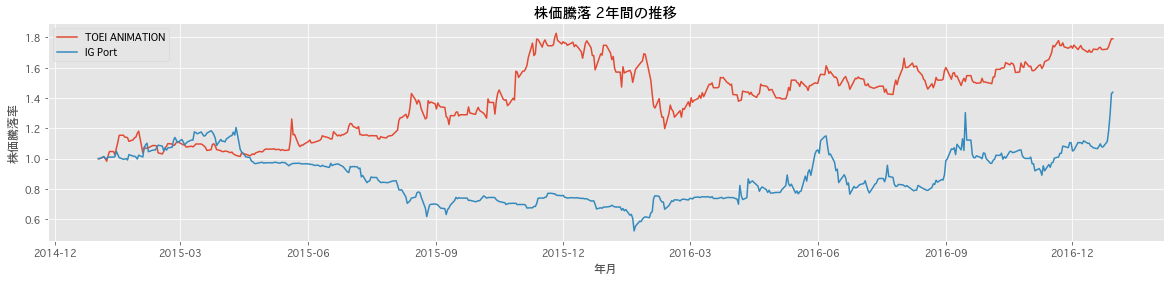

In [56]:
fig, ax = plt.subplots(figsize=(20, 4))

# データと凡例を指定
ax.plot(df.index, df['TOEI ANIMATION'], label=df['TOEI ANIMATION'].name)
ax.plot(df.index, df['IG Port'], label=df['IG Port'].name)

ax.set_title('株価騰落 2年間の推移')
ax.set_ylabel('株価騰落率')
ax.set_xlabel('年月')

ax.legend()
plt.show()

In [57]:
url = 'https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/4816.csv'
df = pd.read_csv(url, index_col=0, parse_dates=['Date'])

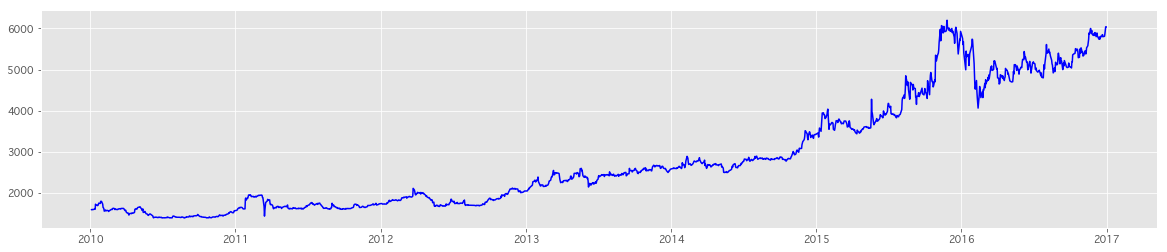

In [58]:
fig, ax = plt.subplots(figsize=(20, 4))

ax.plot(df.index, df['Close'], color='b', label='株価')

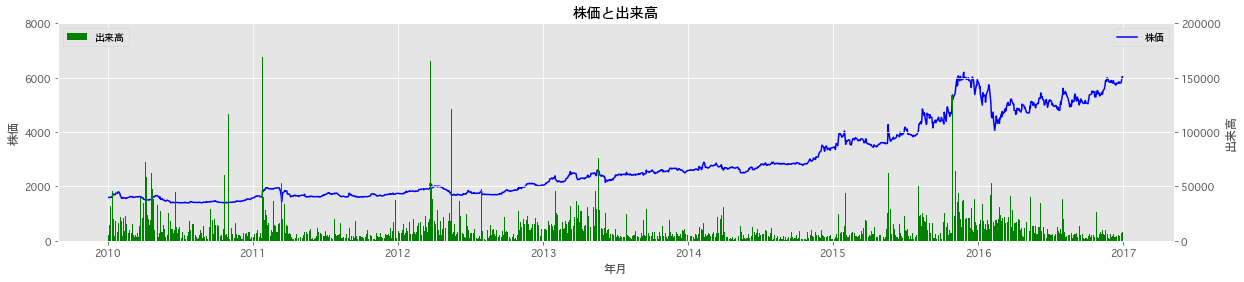

In [66]:
# 2軸を持つグラフを作成する
fig, ax = plt.subplots(figsize=(20, 4))

ax.plot(df.index, df['Close'], color='b', label='株価')
ax2 = ax.twinx()
ax2.bar(df.index, df['Volume'], color='g', label='出来高', width=2)

# 軸とラベルの設定
ax.set_yticks([i * 2000 for i  in range(5)])
ax.set_ylabel('株価')
ax.set_xlabel('年月')

ax2.set_yticks([i * 50000 for i in range(5)])
ax2.set_ylabel('出来高')

# グラフタイトル
ax.set_title('株価と出来高')

ax.legend(loc=1)
ax2.legend(loc=2)

plt.show()

## 散布図

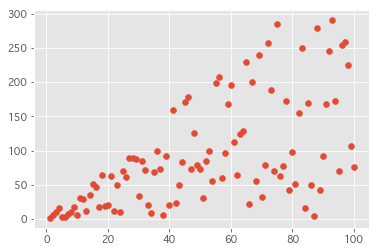

In [67]:
x = np.arange(1, 101)
y = 4 * x * np.random.rand(100)

_, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

In [71]:
url = 'https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/anime_master.csv'
df = pd.read_csv(url, index_col='anime_id')

In [72]:
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


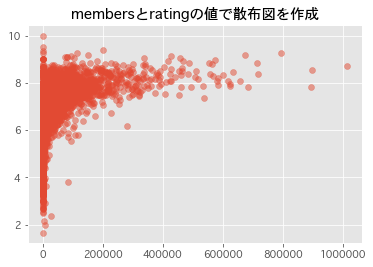

In [74]:
_, ax = plt.subplots()
ax.scatter(df['members'], df['rating'], alpha=0.5)
ax.set_title('membersとratingの値で散布図を作成')
plt.show()

レーティングってなんぞ

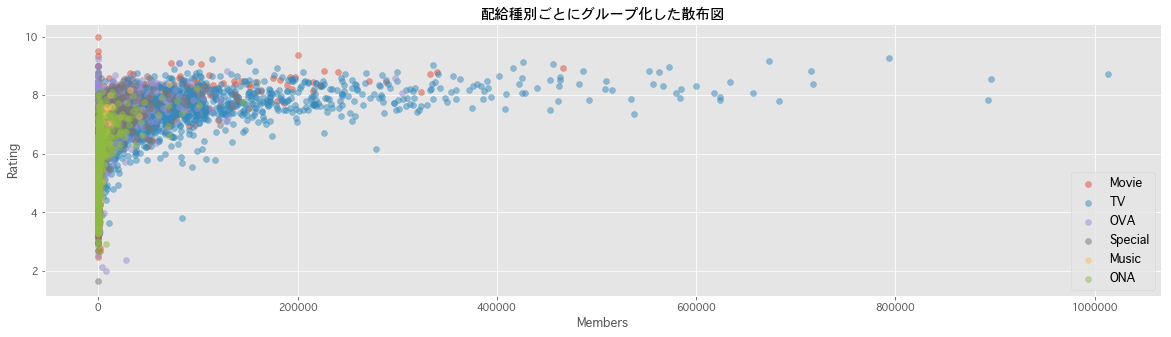

In [76]:
# グループ化された散布図を作成する
types = df['type'].unique()

_, ax = plt.subplots(figsize=(20, 5))
for t in types:
    x = df.loc[df['type'] == t, 'members']
    y = df.loc[df['type'] == t, 'rating']
    
    ax.scatter(x, y, alpha=0.5, label=t)

ax.set_title('配給種別ごとにグループ化した散布図')
ax.set_xlabel('Members')
ax.set_ylabel('Rating')

ax.legend(loc='lower right', fontsize=12)
plt.show()

## 棒グラフ

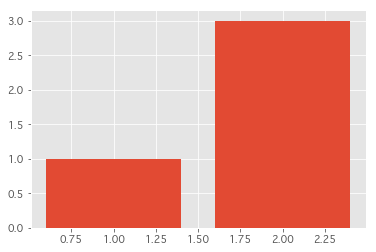

In [78]:
_, ax = plt.subplots()
x = [1, 2]
y = [1, 3]

ax.bar(x, y)
plt.show()

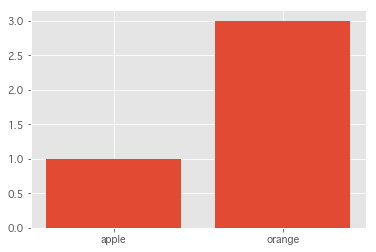

In [79]:
# 目盛り
_, ax = plt.subplots()
x = [1, 2]
y = [1, 3]

labels = ['apple', 'orange']
ax.bar(x, y, tick_label=labels)
plt.show()

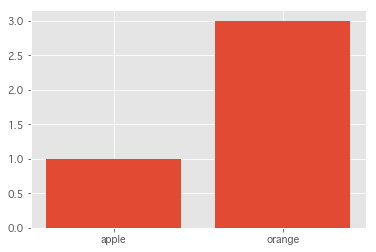

In [86]:
# 目盛り
_, ax = plt.subplots()
x = [1, 2]
y = [1, 3]

labels = ['apple', 'orange']
ax.bar(x, y)
ax.set_xticks(x)  # 数を教えてあげる？
ax.set_xticklabels(labels)  # ほんで、数分のラベルを渡す
plt.show()

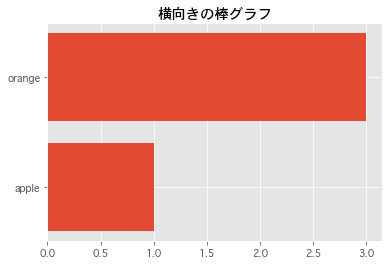

In [89]:
# 横向きの棒グラフ
_, ax = plt.subplots()
x = [1, 2]
y = [1, 3]

labels = ['apple', 'orange']
ax.barh(x, y)
ax.set_yticks(x)  # 数を教えてあげる？
ax.set_yticklabels(labels)  # ほんで、数分のラベルを渡す
ax.set_title('横向きの棒グラフ')
plt.show()

In [90]:
url = 'https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/anime_master.csv'
df = pd.read_csv(url, index_col='anime_id')

In [91]:
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


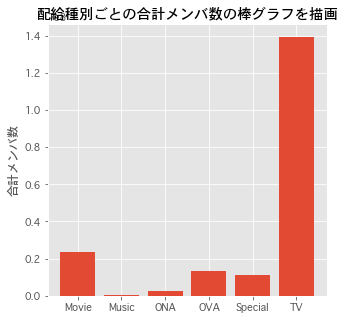

In [100]:
_, ax = plt.subplots(figsize=(5 ,5))
y = df.groupby('type').sum()['members']
x = range(len(y))

xlabels = y.index
ax.bar(x, y)
ax.set_xticks(x)
ax.set_xticklabels(xlabels)
ax.set_ylabel('合計メンバ数')
ax.set_title('配給種別ごとの合計メンバ数の棒グラフを描画')
plt.show()

### 複数グループの棒グラフを作成する

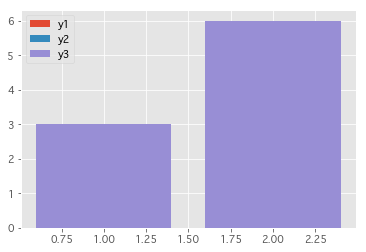

In [104]:
x = [1, 2]
y1, y2, y3 = [1, 2], [2, 4], [3, 6]

_, ax = plt.subplots()

w = 0.2
ax.bar(x, y1, label='y1')
ax.bar(x, y2, label='y2')
ax.bar(x, y3, label='y3')

ax.legend()
plt.show()

これだとグラフ内の棒が重なってしまう

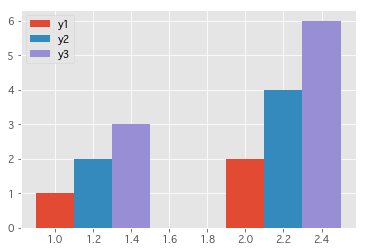

In [109]:
x = [1, 2]
y1, y2, y3 = [1, 2], [2, 4], [3, 6]

_, ax = plt.subplots()

w = 0.2
# 横にづらす
ax.bar(x, y1, width=w, label='y1')
ax.bar(np.array(x) + w, y2, width=w, label='y2')
ax.bar(np.array(x) + w * 2, y3, width=w, label='y3')

ax.legend()
plt.show()

## 複数グループの棒グラフを活用する

In [111]:
url = 'https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/anime_genre_top10_pivoted.csv'
df = pd.read_csv(url, index_col='genre')

In [112]:
df.head()

,Movie,Music,ONA,OVA,Special,TV
genre,,,,,,
Comedy,7293127.0,20860.0,1477266.0,5614758.0,6659293.0,65420862.0
Action,10224960.0,77054.0,524907.0,5793680.0,3412689.0,63364032.0
Drama,9034099.0,100734.0,188427.0,3043374.0,1915578.0,41011557.0
Romance,5245386.0,42811.0,411331.0,3143167.0,2015820.0,40703388.0
Supernatural,5452779.0,9189.0,192989.0,2696715.0,2336723.0,38956520.0


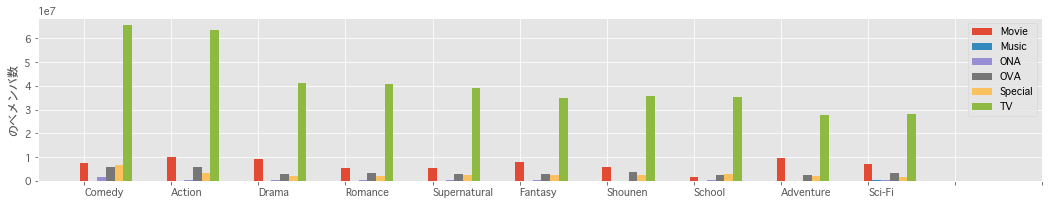

In [114]:
_, ax = plt.subplots(figsize=(18, 3))

wt = np.array(range(len(df)))
w = 0.1

for i in df.columns:
    ax.bar(wt, df[i], width=w, label=i)
    wt = wt + w

ax.set_xticks(range(len(df) + 2))
ax.set_xticklabels(df.index, ha='left')
ax.set_ylabel('のべメンバ数')
ax.legend()

plt.show()

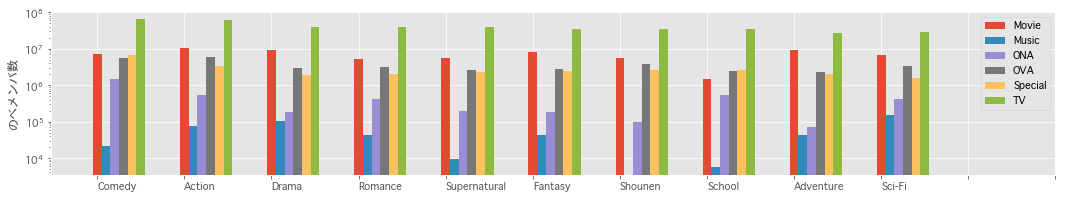

In [115]:
# 見づらいので調整する
_, ax = plt.subplots(figsize=(18, 3))

wt = np.array(range(len(df)))
w = 0.1

for i in df.columns:
    ax.bar(wt, df[i], width=w, label=i)
    wt = wt + w

ax.set_xticks(range(len(df) + 2))
ax.set_xticklabels(df.index, ha='left')
ax.set_ylabel('のべメンバ数')
ax.set_yscale('log')
ax.legend()

plt.show()

## 積み上げ棒グラフの作成

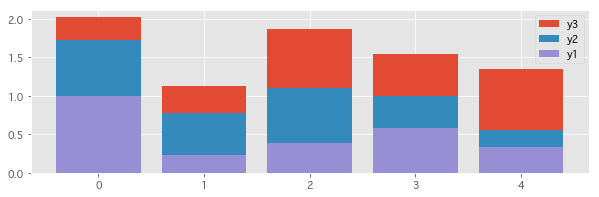

In [117]:
x = np.arange(5)
y = np.random.rand(15).reshape(3,5)

y1, y2, y3 = y

y1b = np.array(y1)
y2b = y1b + np.array(y2)
y3b = y2b + np.array(y3)

_, ax = plt.subplots(figsize=(10, 3))
ax.bar(x, y3b, label='y3')
ax.bar(x, y2b, label='y2')
ax.bar(x, y1b, label='y1')

ax.legend()
plt.show()

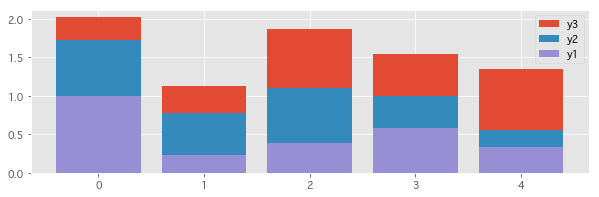

In [120]:
_, ax = plt.subplots(figsize=(10, 3))
ax.bar(x, y3, bottom=y2b, label='y3')
ax.bar(x, y2, bottom=y1, label='y2')
ax.bar(x, y1, label='y1')

ax.legend()
plt.show()

## 積み上げ棒グラフの活用

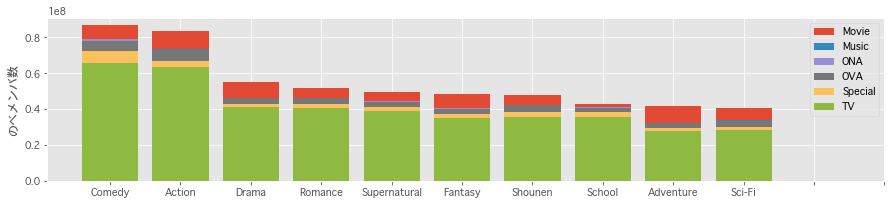

In [122]:
_, ax = plt.subplots(figsize=(15, 3))

rows, cols = len(df), len(df.columns)
x = range(rows)

for i, t in enumerate(df.columns):
    y = df.iloc[:, i:cols].sum(axis=1)
    ax.bar(x, y, label=t)

ax.set_xticks(range(rows + 2))
ax.set_xticklabels(df.index)
ax.set_ylabel('のべメンバ数')
ax.legend()

plt.show()

## ヒストグラム

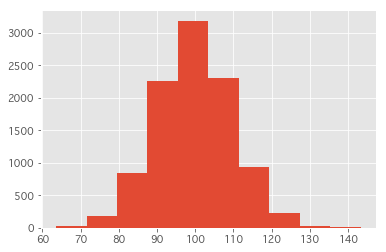

In [123]:
mu = 100
sigma = 10

x = np.random.normal(mu, sigma, 10000)
_, ax = plt.subplots()
ax.hist(x)
plt.show()

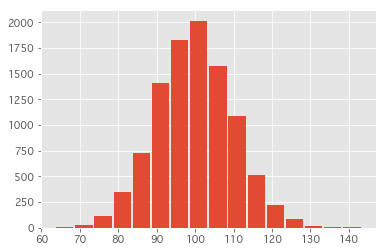

In [124]:
# 幅の調整 -> bins
_, ax = plt.subplots()
ax.hist(x, rwidth=0.9, bins=16)
plt.show()

## ヒストグラムの活用

In [126]:
url = 'https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/anime_master.csv'
df = pd.read_csv(url, index_col='anime_id')
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


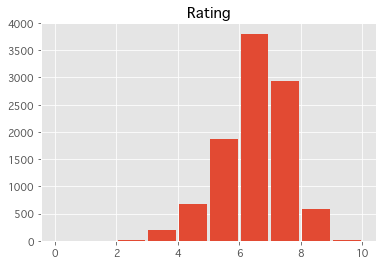

In [127]:
_, ax = plt.subplots()
ax.hist(df['rating'], range=(0, 10), rwidth=0.9)
ax.set_title('Rating')
plt.show()

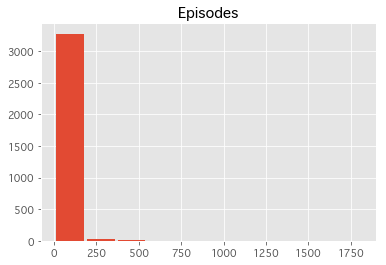

In [129]:
_, ax = plt.subplots()
df_tv = df[df['type'] == 'TV']

ax.hist(df_tv['episodes'], rwidth=0.9)
ax.set_title('Episodes')
plt.show()

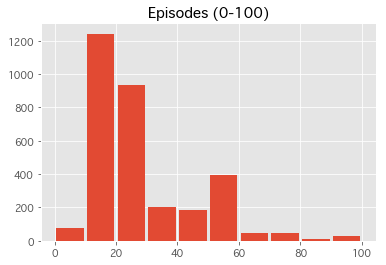

In [131]:
_, ax = plt.subplots()
df_tv = df[df['type'] == 'TV']

ax.hist(df_tv['episodes'], rwidth=0.9, range=(0, 100))
ax.set_title('Episodes (0-100)')
plt.show()

## さまざまなヒストグラム

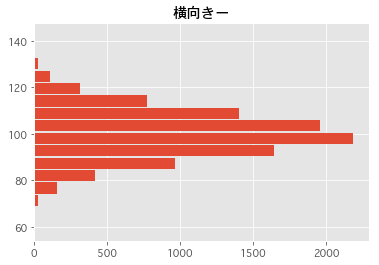

In [135]:
x = np.random.normal(100, 10, 10000)
_, ax = plt.subplots()
ax.hist(x, rwidth=0.9, bins=16, orientation='horizontal')
ax.set_title('横向きー')
plt.show()

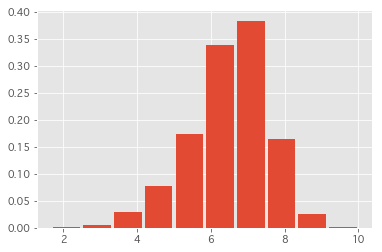

In [139]:
_, ax = plt.subplots()
ax.hist(df['rating'], rwidth=0.9, density=True)  # normed -> densityに変更
plt.show()

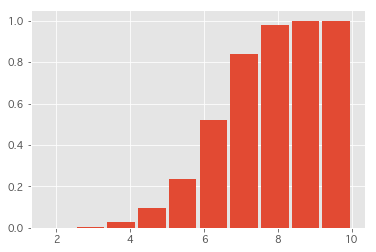

In [140]:
_, ax = plt.subplots()
ax.hist(df['rating'], rwidth=0.9, density=True, cumulative=True)
plt.show()

これはよくわからん

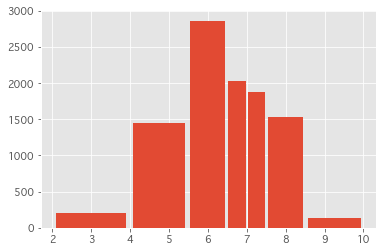

In [141]:
# 階級幅の設定
_, ax = plt.subplots()
ax.hist(df['rating'], rwidth=0.9, bins=[2, 4, 5.5, 6.5, 7, 7.5, 8.5 , 10])
plt.show()

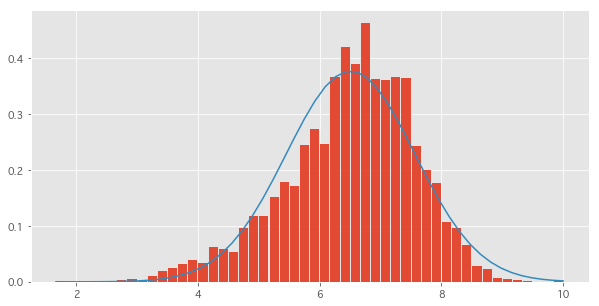

In [143]:
bins = 50
df_min = df['rating'].min()
df_max = df['rating'].max()

_, ax = plt.subplots(figsize=(10, 5))

ax.hist(df['rating'], bins=bins, range=(df_min, df_max), density=True, rwidth=0.9)

_mean, _std = df['rating'].mean(), df['rating'].std()

x = np.linspace(df_min, df_max, bins)
y = 1 / (_std * np.sqrt(2 * np.pi)) * np.exp(- (x - _mean) ** 2 / (2 * _std ** 2))

ax.plot(x, y)
plt.show()

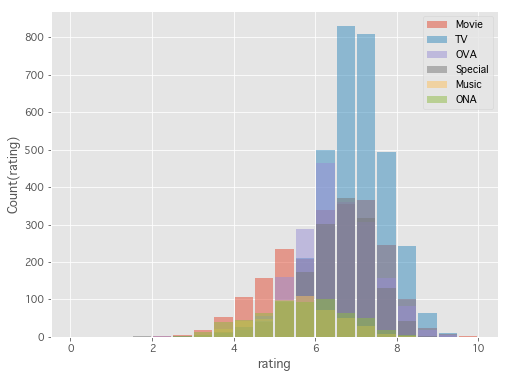

In [144]:
types = df['type'].unique()
labels = types.tolist()

_, ax = plt.subplots(figsize=(8, 6))

b_num = np.arange(0, 10.5, 0.5)

for t in types:
    ax.hist(df.loc[df['type'] == t, 'rating'],
           bins=b_num,
           rwidth=0.9,
           alpha=0.5,
           label=t)

ax.legend()
ax.set_xlabel('rating')
ax.set_ylabel('Count(rating)')

plt.show()

/Users/k.tamashiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


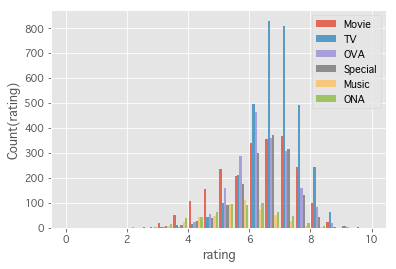

In [145]:
dataset = [df.loc[df['type'] == t, 'rating'] for t in types]
_, ax = plt.subplots()
ax.hist(dataset,
       bins=np.arange(0, 10.5, 0.5),
       rwidth=0.9,
       alpha=0.8,
       label=labels)

ax.legend()
ax.set_xlabel('rating')
ax.set_ylabel('Count(rating)')

plt.show()

/Users/k.tamashiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


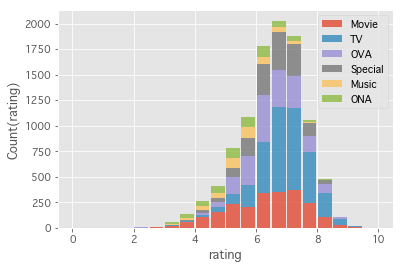

In [146]:
dataset = [df.loc[df['type'] == t, 'rating'] for t in types]
_, ax = plt.subplots()
ax.hist(dataset,
       bins=np.arange(0, 10.5, 0.5),
       rwidth=0.9,
       alpha=0.8,
       label=labels,
       stacked=True)

ax.legend()
ax.set_xlabel('rating')
ax.set_ylabel('Count(rating)')

plt.show()

## 箱ひげ図

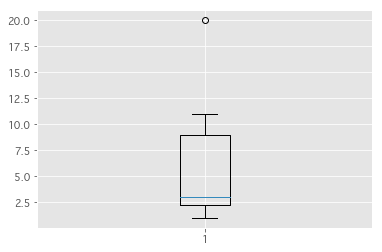

In [148]:
x = [1, 2, 3, 3, 11, 20]
_, ax = plt.subplots()
ax.boxplot(x)
plt.show()

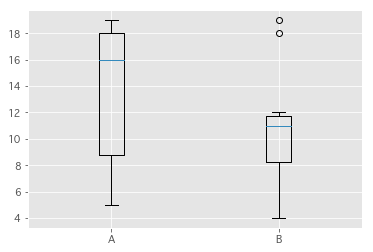

In [154]:
x = [np.random.randint(0, 20, 10), np.random.randint(0, 20, 10)]
labels = ['A', 'B']

_, ax = plt.subplots()
ax.boxplot(x, labels=labels)
plt.show()

In [174]:
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


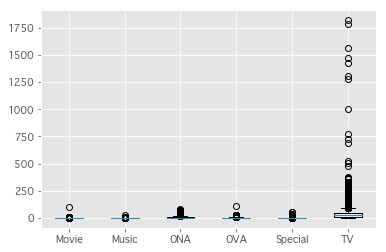

In [175]:
labels = []
types_list = []

for label, df_per_type in df.groupby('type'):
    labels.append(label)
    types_list.append(df_per_type['episodes'].tolist())

_, ax = plt.subplots()
ax.boxplot(types_list, labels=labels)

plt.show()

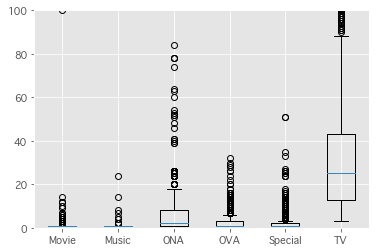

In [176]:
_, ax = plt.subplots()
ax.boxplot(types_list, labels=labels)
ax.set_ylim(0, 100)

plt.show()